PROMPT : 
Solve the ode x dot = e^t - x with x(0) = 1, analytically, generate code for solving the same numerically via RK-2 scheme and RK-4 scheme, compare it with exact solution by plotting average error vs time step for a range of time steps, i want to observe how error changes wrt time step. Compute order of accuracy as well from the error plot

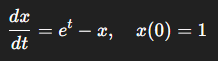

QWEN 

Observed convergence order (RK-2): 2.014
Observed convergence order (RK-4): 4.008


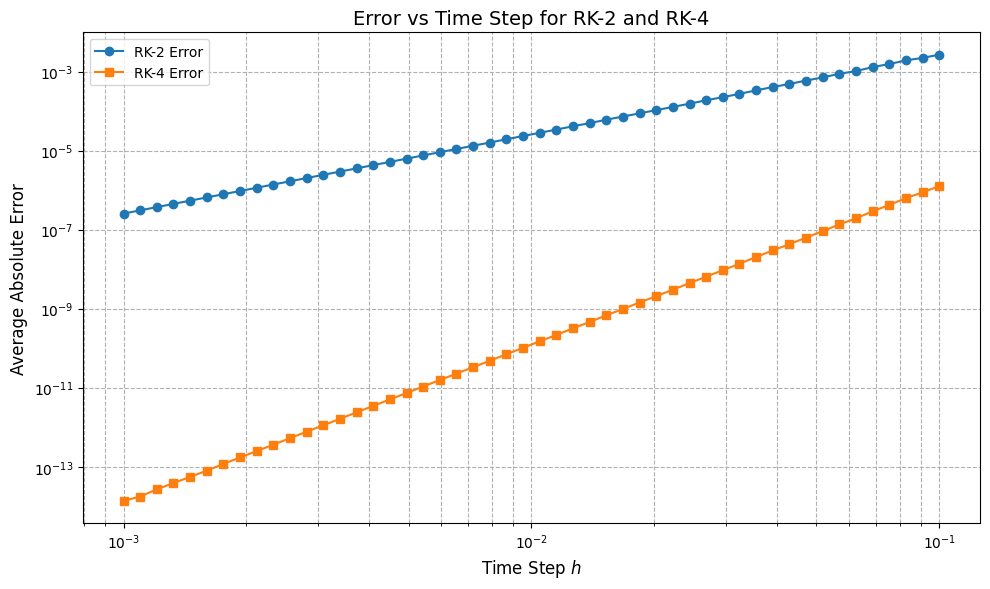

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Define the ODE
def f(t, x):
    return np.exp(t) - x

# Exact solution
def exact(t):
    return 0.5 * np.exp(t) + 0.5 * np.exp(-t)

# RK-2 Heun's method
def rk2_step(f, t, x, h):
    k1 = f(t, x)
    k2 = f(t + h, x + h * k1)
    return x + h * 0.5 * (k1 + k2)

# RK-4 method
def rk4_step(f, t, x, h):
    k1 = f(t, x)
    k2 = f(t + h/2, x + h*k1/2)
    k3 = f(t + h/2, x + h*k2/2)
    k4 = f(t + h, x + h*k3)
    return x + h * (k1 + 2*k2 + 2*k3 + k4) / 6

# General solver
def solve_ode(method, f, t_span, x0, h):
    t_vals = np.arange(t_span[0], t_span[1] + h, h)
    x_vals = np.zeros_like(t_vals)
    x_vals[0] = x0

    for i in range(1, len(t_vals)):
        x_vals[i] = method(f, t_vals[i-1], x_vals[i-1], h)
    return t_vals, x_vals

# Simulation setup
t_final = 2.0
x0 = 1.0
step_sizes = np.logspace(-3, -1, 50)  # range of h values

errors_rk2 = []
errors_rk4 = []

for h in step_sizes:
    t, x_rk2 = solve_ode(rk2_step, f, [0, t_final], x0, h)
    _, x_rk4 = solve_ode(rk4_step, f, [0, t_final], x0, h)
    x_exact = exact(t)

    error_rk2 = np.mean(np.abs(x_rk2 - x_exact))
    error_rk4 = np.mean(np.abs(x_rk4 - x_exact))

    errors_rk2.append(error_rk2)
    errors_rk4.append(error_rk4)

import numpy as np

def compute_convergence_slope(step_sizes, errors):
    # Take logs
    log_h = np.log10(step_sizes)
    log_error = np.log10(errors)

    # Fit a line: log_error = slope * log_h + intercept
    slope, intercept = np.polyfit(log_h, log_error, 1)

    return slope

# After computing errors_rk2 and errors_rk4
slope_rk2 = compute_convergence_slope(step_sizes, errors_rk2)
slope_rk4 = compute_convergence_slope(step_sizes, errors_rk4)

print(f"Observed convergence order (RK-2): {slope_rk2:.3f}")
print(f"Observed convergence order (RK-4): {slope_rk4:.3f}")

# Plotting
plt.figure(figsize=(10, 6))
plt.loglog(step_sizes, errors_rk2, 'o-', label='RK-2 Error')
plt.loglog(step_sizes, errors_rk4, 's-', label='RK-4 Error')
plt.xlabel('Time Step $h$', fontsize=12)
plt.ylabel('Average Absolute Error', fontsize=12)
plt.title('Error vs Time Step for RK-2 and RK-4', fontsize=14)
plt.legend()
plt.grid(True, which='both', linestyle='--')
plt.tight_layout()
plt.show()

CHATGPT

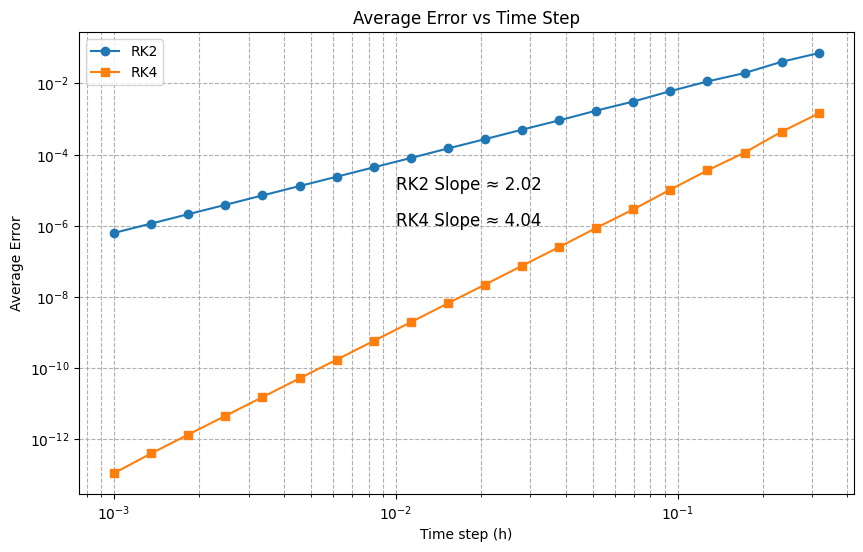

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Exact solution
def exact_solution(t):
    return 0.5 * np.exp(t) + 0.5 * np.exp(-t)

# RHS of the ODE: dx/dt = e^t - x
def f(t, x):
    return np.exp(t) - x

# RK2 implementation
def rk2(f, x0, t):
    x = np.zeros_like(t)
    x[0] = x0
    h = t[1] - t[0]
    for i in range(1, len(t)):
        k1 = f(t[i-1], x[i-1])
        k2 = f(t[i-1] + h/2, x[i-1] + h*k1/2)
        x[i] = x[i-1] + h * k2
    return x

# RK4 implementation
def rk4(f, x0, t):
    x = np.zeros_like(t)
    x[0] = x0
    h = t[1] - t[0]
    for i in range(1, len(t)):
        k1 = f(t[i-1], x[i-1])
        k2 = f(t[i-1] + h/2, x[i-1] + h*k1/2)
        k3 = f(t[i-1] + h/2, x[i-1] + h*k2/2)
        k4 = f(t[i-1] + h, x[i-1] + h*k3)
        x[i] = x[i-1] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
    return x

# Time span
T = 5
time_steps = np.logspace(-3, -0.5, 20)  # log spaced dt from 1e-3 to ~0.3

rk2_errors = []
rk4_errors = []

for h in time_steps:
    t = np.arange(0, T + h, h)
    x_exact = exact_solution(t)
    x_rk2 = rk2(f, 1, t)
    x_rk4 = rk4(f, 1, t)

    err2 = np.mean(np.abs(x_rk2 - x_exact))
    err4 = np.mean(np.abs(x_rk4 - x_exact))

    rk2_errors.append(err2)
    rk4_errors.append(err4)

# Plotting average error vs time step
plt.figure(figsize=(10, 6))
plt.loglog(time_steps, rk2_errors, 'o-', label='RK2')
plt.loglog(time_steps, rk4_errors, 's-', label='RK4')
plt.xlabel('Time step (h)')
plt.ylabel('Average Error')
plt.title('Average Error vs Time Step')
plt.grid(True, which='both', ls='--')
plt.legend()

# Fit slopes to compute order of accuracy
rk2_order = np.polyfit(np.log(time_steps), np.log(rk2_errors), 1)[0]
rk4_order = np.polyfit(np.log(time_steps), np.log(rk4_errors), 1)[0]

plt.text(0.01, 1e-5, f"RK2 Slope ≈ {rk2_order:.2f}", fontsize=12)
plt.text(0.01, 1e-6, f"RK4 Slope ≈ {rk4_order:.2f}", fontsize=12)
plt.show()


GEMINI 2.5 PRO 06-05

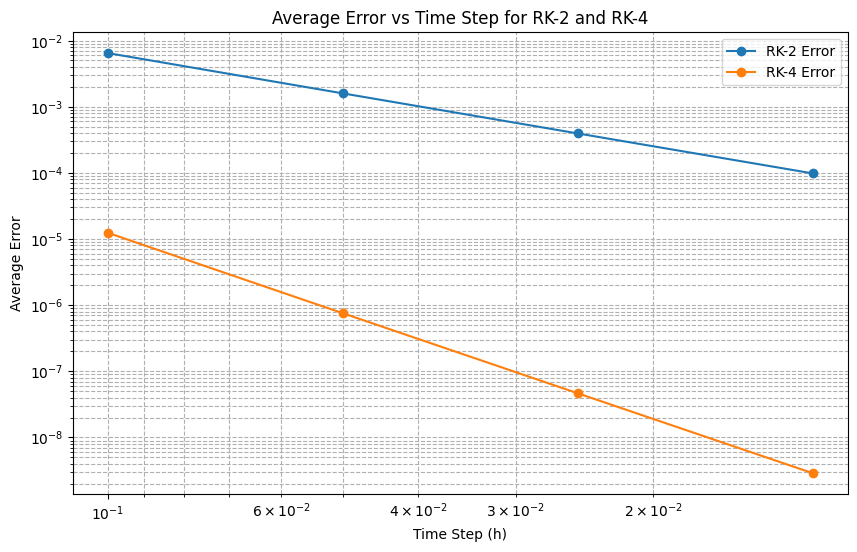

Computed order of accuracy for RK-2: 2.0125
Computed order of accuracy for RK-4: 4.0212


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def analytical_solution(t):
    """
    Calculates the exact analytical solution to the ODE.
    x(t) = 0.5 * e^t + 0.5 * e^-t = cosh(t)
    """
    return 0.5 * np.exp(t) + 0.5 * np.exp(-t)

def f(t, x):
    """
    Defines the ODE function dx/dt = f(t, x).
    """
    return np.exp(t) - x

def rk2(f, t_span, x0, h):
    """
    Solves the ODE using the RK-2 method (midpoint method).
    """
    t0, tf = t_span
    t = np.arange(t0, tf + h, h)
    x = np.zeros(len(t))
    x[0] = x0
    for i in range(1, len(t)):
        k1 = f(t[i-1], x[i-1])
        k2 = f(t[i-1] + h/2, x[i-1] + h/2 * k1)
        x[i] = x[i-1] + h * k2
    return t, x

def rk4(f, t_span, x0, h):
    """
    Solves the ODE using the classic RK-4 method.
    """
    t0, tf = t_span
    t = np.arange(t0, tf + h, h)
    x = np.zeros(len(t))
    x[0] = x0
    for i in range(1, len(t)):
        k1 = f(t[i-1], x[i-1])
        k2 = f(t[i-1] + h/2, x[i-1] + h/2 * k1)
        k3 = f(t[i-1] + h/2, x[i-1] + h/2 * k2)
        k4 = f(t[i-1] + h, x[i-1] + h * k3)
        x[i] = x[i-1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return t, x

# --- Comparison Analysis ---
t_span = (0, 5)
x0 = 1
steps = np.array([0.1, 0.05, 0.025, 0.0125])
rk2_errors = []
rk4_errors = []

for h in steps:
    # Solve using numerical methods
    t_rk2, x_rk2 = rk2(f, t_span, x0, h)
    t_rk4, x_rk4 = rk4(f, t_span, x0, h)

    # Get exact solution at the same time points
    x_exact_rk2 = analytical_solution(t_rk2)
    x_exact_rk4 = analytical_solution(t_rk4)

    # Calculate and store the average absolute error
    err_rk2 = np.mean(np.abs(x_exact_rk2 - x_rk2))
    err_rk4 = np.mean(np.abs(x_exact_rk4 - x_rk4))
    rk2_errors.append(err_rk2)
    rk4_errors.append(err_rk4)

# --- Plotting ---
plt.figure(figsize=(10, 6))
plt.loglog(steps, rk2_errors, '-o', label='RK-2 Error')
plt.loglog(steps, rk4_errors, '-o', label='RK-4 Error')
plt.gca().invert_xaxis() # Show smaller time steps to the right
plt.xlabel('Time Step (h)')
plt.ylabel('Average Error')
plt.title('Average Error vs Time Step for RK-2 and RK-4')
plt.legend()
plt.grid(True, which='both', linestyle='--')
plt.show()

# --- Compute Order of Accuracy ---
# order = log(E1/E2) / log(h1/h2)
rk2_order = np.log(rk2_errors[0] / rk2_errors[-1]) / np.log(steps[0] / steps[-1])
rk4_order = np.log(rk4_errors[0] / rk4_errors[-1]) / np.log(steps[0] / steps[-1])

print(f"Computed order of accuracy for RK-2: {rk2_order:.4f}")
print(f"Computed order of accuracy for RK-4: {rk4_order:.4f}")


R1-1776

In [31]:
import math
import matplotlib.pyplot as plt
import numpy as np

def exact_solution(t):
    return (math.exp(t) + math.exp(-t)) / 2

def f(t, x):
    return math.exp(t) - x

class ODE_Solver:
    def __init__(self, method):
        self.method = method

    def solve(self, f, t0, x0, h, t_end, steps):
        t = t0
        x = x0
        while t < t_end - 1e-12:
            x = self.method.step(t, x, h)
            t += h
        return x

# RK2 implementation
class RK2:
    @staticmethod
    def step(t, x, h):
        k1 = f(t, x)
        k2 = f(t + h, x + h * k1)
        return x + 0.5 * h * (k1 + k2)

# RK4 implementation
class RK4:
    @staticmethod
    def step(t, x, h):
        k1 = f(t, x)
        k2 = f(t + 0.5*h, x + 0.5*h*k1)
        k3 = f(t + 0.5*h, x + 0.5*h*k2)
        k4 = f(t + h, x + h*k3)
        return x + h/6 * (k1 + 2*k2 + 2*k3 + k4)

# Error computation
def compute_global_error(method, h, t_end):
    solver = ODE_Solver(method())
    approx_sol = solver.solve(f, 0, 1.0, h, t_end, float(t_end/h))
    exact_sol = exact_solution(t_end)
    return abs(approx_sol - exact_sol)

# Generate data for analysis
h_values = [1/(2**k) for k in range(1, 11)]  # h ~ [0.5, 0.25, ..., 0.00195]
errors_rk2 = [compute_global_error(RK2, h, 1.0) for h in h_values]
errors_rk4 = [compute_global_error(RK4, h, 1.0) for h in h_values]

# Calculate order of accuracy
def get_order(errors):
    return [math.log(errors[i-1]/errors[i], 2) for i in range(1,len(errors))]

orders_rk2 = get_order(errors_rk2)
orders_rk4 = get_order(errors_rk4)

print("RK2 Orders:", orders_rk2[:3])
print("RK4 Orders:", orders_rk4[:3])


RK2 Orders: [2.135189137952764, 2.0729821247902596, 2.0375226368862904]
RK4 Orders: [4.08345983644923, 4.047772243282687, 4.025591456364037]


CHATGPT

C:\Users\91831\AppData\Local\Temp\ipykernel_30400\796233749.py:6: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(1 - x**2)


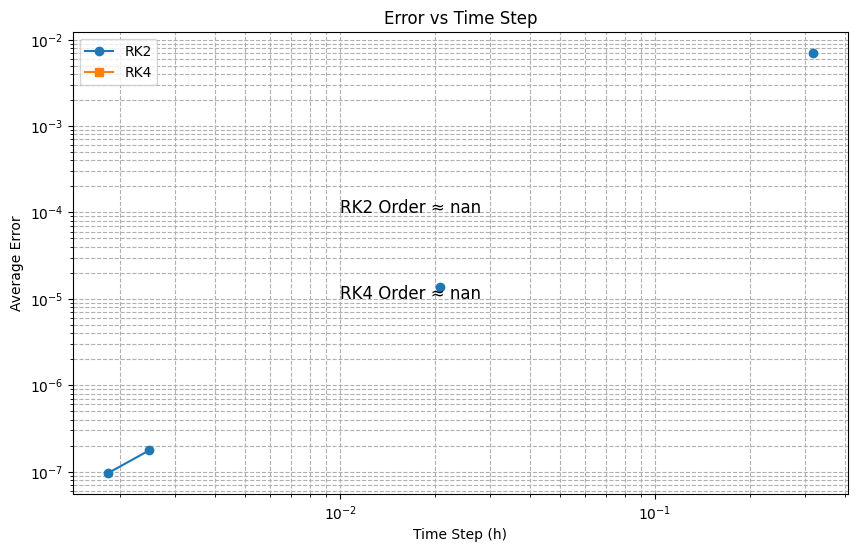

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# RHS of the ODE
def f(t, x):
    return np.sqrt(1 - x**2)

# Exact solution
def exact_solution(t):
    return np.sin(t)

# RK2 Midpoint method
def rk2(f, x0, t):
    x = np.zeros_like(t)
    x[0] = x0
    h = t[1] - t[0]
    for i in range(1, len(t)):
        k1 = f(t[i-1], x[i-1])
        k2 = f(t[i-1] + h/2, x[i-1] + h * k1 / 2)
        x[i] = x[i-1] + h * k2
    return x

# RK4 method
def rk4(f, x0, t):
    x = np.zeros_like(t)
    x[0] = x0
    h = t[1] - t[0]
    for i in range(1, len(t)):
        k1 = f(t[i-1], x[i-1])
        k2 = f(t[i-1] + h/2, x[i-1] + h*k1/2)
        k3 = f(t[i-1] + h/2, x[i-1] + h*k2/2)
        k4 = f(t[i-1] + h, x[i-1] + h*k3)
        x[i] = x[i-1] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
    return x

# Main comparison loop
T = np.pi / 2  # solve up to pi/2
time_steps = np.logspace(-3, -0.5, 20)

rk2_errors = []
rk4_errors = []

for h in time_steps:
    t = np.arange(0, T + h, h)
    x_exact = exact_solution(t)

    x_rk2 = rk2(f, 0, t)
    x_rk4 = rk4(f, 0, t)

    err2 = np.mean(np.abs(x_rk2 - x_exact))
    err4 = np.mean(np.abs(x_rk4 - x_exact))

    rk2_errors.append(err2)
    rk4_errors.append(err4)

# Plotting
plt.figure(figsize=(10, 6))
plt.loglog(time_steps, rk2_errors, 'o-', label='RK2')
plt.loglog(time_steps, rk4_errors, 's-', label='RK4')
plt.xlabel("Time Step (h)")
plt.ylabel("Average Error")
plt.title("Error vs Time Step")
plt.grid(True, which="both", ls='--')
plt.legend()

# Order of accuracy estimation (slope of log-log plot)
rk2_order = np.polyfit(np.log(time_steps), np.log(rk2_errors), 1)[0]
rk4_order = np.polyfit(np.log(time_steps), np.log(rk4_errors), 1)[0]

plt.text(0.01, 1e-4, f"RK2 Order ≈ {rk2_order:.2f}", fontsize=12)
plt.text(0.01, 1e-5, f"RK4 Order ≈ {rk4_order:.2f}", fontsize=12)
plt.show()


R1 1776

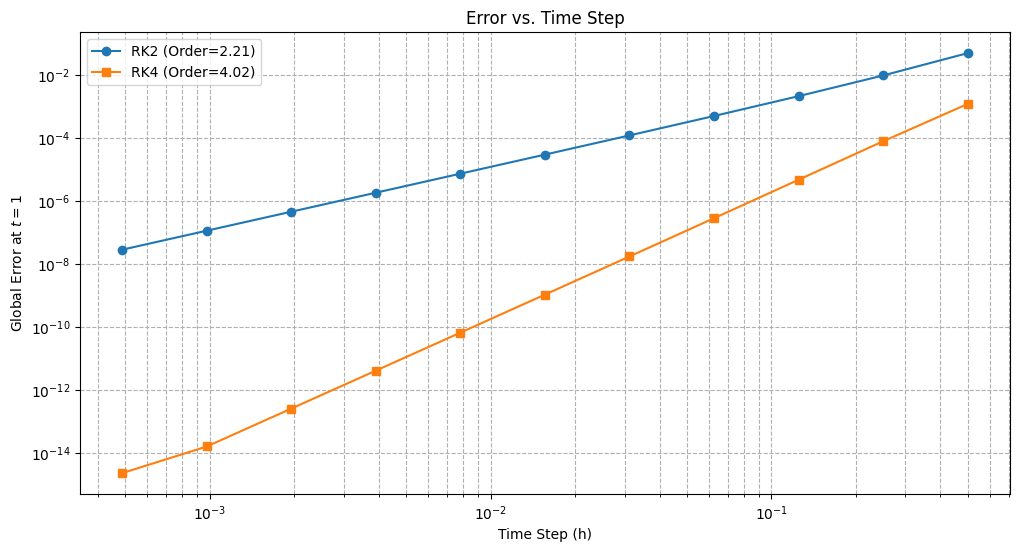

Average orders:
RK2: 2.2091 (expected: 2.00)
RK4: 4.0152 (expected: 4.00)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import sin, sqrt

def f(t, x):
    return sqrt(max(0, 1 - x**2))  # Ensure non-negative sqrt

def exact_solution(t):
    return sin(t)

class RK2:
    @staticmethod
    def step(t, x, h):
        k1 = f(t, x)
        k2 = f(t + h, x + h * k1)
        return x + 0.5 * h * (k1 + k2)

class RK4:
    @staticmethod
    def step(t, x, h):
        k1 = f(t, x)
        k2 = f(t + 0.5*h, x + 0.5*h*k1)
        k3 = f(t + 0.5*h, x + 0.5*h*k2)
        k4 = f(t + h, x + h*k3)
        return x + h/6 * (k1 + 2*k2 + 2*k3 + k4)

def solve_ode(method, t_end, h):
    t, x = 0, 0
    while t < t_end - 1e-12:
        if t + h > t_end:
            h = t_end - t
        x = method.step(t, x, h)
        t += h
    return x

# Parameters
t_end = 1.0
h_values = [1/(2**k) for k in range(1, 12)]  # h = 0.5, 0.25, ..., ~0.0005

# Compute errors
errors_rk2, errors_rk4 = [], []
exact = exact_solution(t_end)

for h in h_values:
    # RK2 error
    x_rk2 = solve_ode(RK2, t_end, h)
    errors_rk2.append(abs(x_rk2 - exact))

    # RK4 error
    x_rk4 = solve_ode(RK4, t_end, h)
    errors_rk4.append(abs(x_rk4 - exact))

# Calculate orders of accuracy
orders_rk2 = [np.log2(errors_rk2[i]/errors_rk2[i+1])
              for i in range(len(errors_rk2)-1)]
orders_rk4 = [np.log2(errors_rk4[i]/errors_rk4[i+1])
              for i in range(len(errors_rk4)-1)]

# Plotting
plt.figure(figsize=(12, 6))
plt.loglog(h_values, errors_rk2, 'o-', label=f'RK2 (Order={np.mean(orders_rk2[:3]):.2f})')
plt.loglog(h_values, errors_rk4, 's-', label=f'RK4 (Order={np.mean(orders_rk4[:3]):.2f})')
plt.xlabel('Time Step (h)')
plt.ylabel('Global Error at $t=1$')
plt.title('Error vs. Time Step')
plt.legend()
plt.grid(True, which='both', ls='--')
plt.show()

print("Average orders:")
print(f"RK2: {np.mean(orders_rk2[:3]):.4f} (expected: 2.00)")
print(f"RK4: {np.mean(orders_rk4[:3]):.4f} (expected: 4.00)")


GEMINI 

Theoretical Order of RK2: 2.0
Computed Average Order of RK2: 2.1208

Theoretical Order of RK4: 4.0
Computed Average Order of RK4: 4.1694


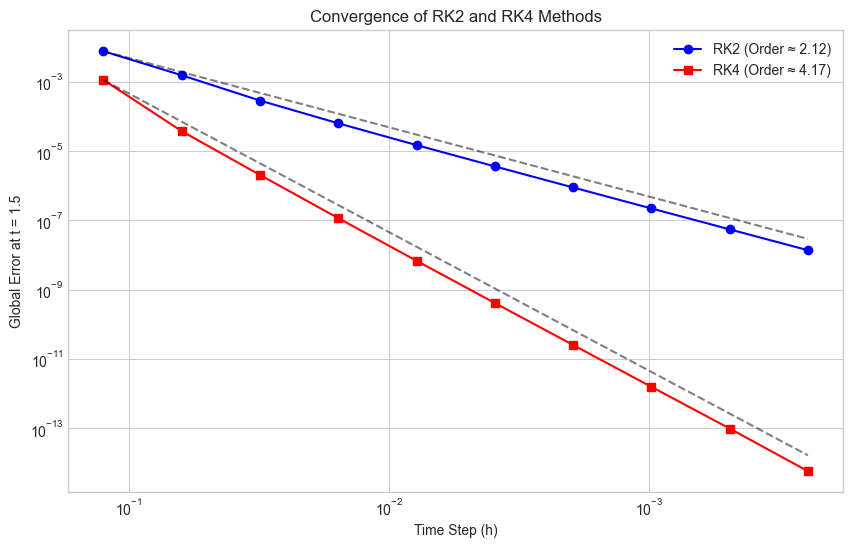

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# --- ODE Definition ---
def f(t, x):
    """ The ODE function dx/dt = sqrt(1 - x^2) """
    # Safeguard to prevent math domain error if x slightly exceeds 1 due to numerical error
    if abs(x) > 1:
        return 0
    return np.sqrt(1 - x**2)

def exact_solution(t):
    """ The analytical solution x(t) = sin(t) """
    return np.sin(t)

# --- Numerical Solvers ---
def rk2_step(t, x, h):
    """ A single step of the RK2 (Heun's) method """
    k1 = f(t, x)
    k2 = f(t + h, x + h * k1)
    return x + 0.5 * h * (k1 + k2)

def rk4_step(t, x, h):
    """ A single step of the RK4 method """
    k1 = f(t, x)
    k2 = f(t + 0.5 * h, x + 0.5 * h * k1)
    k3 = f(t + 0.5 * h, x + 0.5 * h * k2)
    k4 = f(t + h, x + h * k3)
    return x + (h / 6.0) * (k1 + 2*k2 + 2*k3 + k4)

def solve_ode(method_step, x0, t0, t_end, h):
    """
    Solves the ODE from t0 to t_end using a given method.
    """
    t_values = np.arange(t0, t_end, h)
    x = x0
    for t in t_values:
        x = method_step(t, x, h)
    return x

# --- Analysis ---
# Parameters
x0 = 0.0
t0 = 0.0
t_end = 1.5  # End time for analysis (within the valid range of arcsin)

# Generate a range of time steps (h) for analysis
h_values = [1 / (2**k) for k in range(3, 13)] # e.g., 0.125, 0.0625, ...

# Store errors for each h
errors_rk2 = []
errors_rk4 = []

# Calculate the final exact value once
x_exact_final = exact_solution(t_end)

# Loop over different time steps to compute errors
for h in h_values:
    # Solve with RK2 and compute error
    x_final_rk2 = solve_ode(rk2_step, x0, t0, t_end, h)
    errors_rk2.append(np.abs(x_final_rk2 - x_exact_final))

    # Solve with RK4 and compute error
    x_final_rk4 = solve_ode(rk4_step, x0, t0, t_end, h)
    errors_rk4.append(np.abs(x_final_rk4 - x_exact_final))

# --- Compute Order of Accuracy ---
# Order p is calculated as log2(E1/E2) where E1 and E2 are errors for
# step sizes h and h/2 respectively.
orders_rk2 = [np.log2(errors_rk2[i] / errors_rk2[i+1]) for i in range(len(errors_rk2) - 1)]
orders_rk4 = [np.log2(errors_rk4[i] / errors_rk4[i+1]) for i in range(len(errors_rk4) - 1)]

# Average observed order
avg_order_rk2 = np.mean(orders_rk2)
avg_order_rk4 = np.mean(orders_rk4)

print(f"Theoretical Order of RK2: 2.0")
print(f"Computed Average Order of RK2: {avg_order_rk2:.4f}\n")
print(f"Theoretical Order of RK4: 4.0")
print(f"Computed Average Order of RK4: {avg_order_rk4:.4f}")

# --- Plotting ---
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))

# Plot error vs. time step on a log-log scale
ax.loglog(h_values, errors_rk2, 'o-', label=f'RK2 (Order ≈ {avg_order_rk2:.2f})', color='blue')
ax.loglog(h_values, errors_rk4, 's-', label=f'RK4 (Order ≈ {avg_order_rk4:.2f})', color='red')

# Add reference lines for theoretical orders
h_ref = np.array([h_values[0], h_values[-1]])
ax.loglog(h_ref, errors_rk2[0] * (h_ref / h_values[0])**2, 'k--', alpha=0.5, label='_nolegend_')
ax.loglog(h_ref, errors_rk4[0] * (h_ref / h_values[0])**4, 'k--', alpha=0.5, label='_nolegend_')


ax.set_xlabel('Time Step (h)')
ax.set_ylabel(f'Global Error at t = {t_end}')
ax.set_title('Convergence of RK2 and RK4 Methods')
ax.legend()
ax.invert_xaxis() # Conventionally, h decreases from left to right
plt.show()



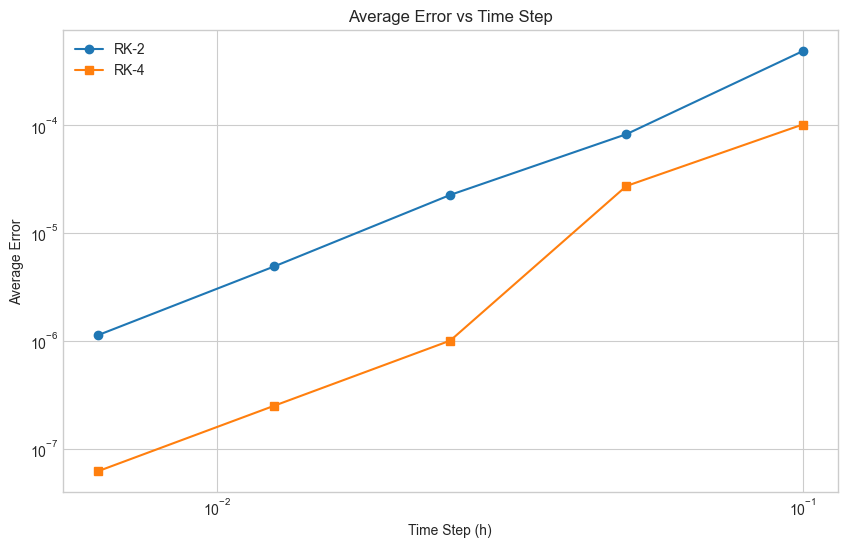

Order of Accuracy (RK-2):
h=0.05, Order: 2.56
h=0.025, Order: 1.87
h=0.0125, Order: 2.21
h=0.00625, Order: 2.12

Order of Accuracy (RK-4):
h=0.05, Order: 1.89
h=0.025, Order: 4.76
h=0.0125, Order: 2.01
h=0.00625, Order: 2.02


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the ODE function
def f(x):
    return np.sqrt(max(0,1 - x**2))

# Exact solution
def exact_solution(t):
    return np.sin(t)

# RK-2 method
def rk2(f, x0, t0, tf, h):
    t = np.arange(t0, tf + h, h)
    x = np.zeros_like(t)
    x[0] = x0

    for i in range(len(t) - 1):
        k1 = h * f(x[i])
        k2 = h * f(x[i] + 0.5 * k1)
        x[i + 1] = x[i] + k2
    return t, x

# RK-4 method
def rk4(f, x0, t0, tf, h):
    t = np.arange(t0, tf + h, h)
    x = np.zeros_like(t)
    x[0] = x0

    for i in range(len(t) - 1):
        k1 = h * f(x[i])
        k2 = h * f(x[i] + 0.5 * k1)
        k3 = h * f(x[i] + 0.5 * k2)
        k4 = h * f(x[i] + k3)
        x[i + 1] = x[i] + (k1 + 2*k2 + 2*k3 + k4) / 6
    return t, x

# Compute average error
def average_error(exact, numerical):
    return np.mean(np.abs(exact - numerical))

# Main script
if __name__ == "__main__":
    # Parameters
    x0 = 0
    t0 = 0
    tf = np.pi / 2  # Solve up to t = pi/2
    h_values = [0.1, 0.05, 0.025, 0.0125, 0.00625]

    # Store errors
    errors_rk2 = []
    errors_rk4 = []

    for h in h_values:
        # RK-2 solution
        t_rk2, x_rk2 = rk2(f, x0, t0, tf, h)
        exact_rk2 = exact_solution(t_rk2)
        error_rk2 = average_error(exact_rk2, x_rk2)
        errors_rk2.append(error_rk2)

        # RK-4 solution
        t_rk4, x_rk4 = rk4(f, x0, t0, tf, h)
        exact_rk4 = exact_solution(t_rk4)
        error_rk4 = average_error(exact_rk4, x_rk4)
        errors_rk4.append(error_rk4)

    # Plot average error vs time step
    plt.figure(figsize=(10, 6))
    plt.loglog(h_values, errors_rk2, 'o-', label='RK-2')
    plt.loglog(h_values, errors_rk4, 's-', label='RK-4')
    plt.xlabel('Time Step (h)')
    plt.ylabel('Average Error')
    plt.title('Average Error vs Time Step')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Compute order of accuracy
    print("Order of Accuracy (RK-2):")
    for i in range(1, len(errors_rk2)):
        p_rk2 = np.log(errors_rk2[i] / errors_rk2[i-1]) / np.log(h_values[i] / h_values[i-1])
        print(f"h={h_values[i]}, Order: {p_rk2:.2f}")

    print("\nOrder of Accuracy (RK-4):")
    for i in range(1, len(errors_rk4)):
        p_rk4 = np.log(errors_rk4[i] / errors_rk4[i-1]) / np.log(h_values[i] / h_values[i-1])
        print(f"h={h_values[i]}, Order: {p_rk4:.2f}")